<a href="https://colab.research.google.com/github/saiabhiteja/Natural_language_processing/blob/main/Basic_Nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd
import wordcloud
import  matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/5000 YT comments.csv',encoding='ISO-8859-1')
df.head()

,Name,Comment,Time,Likes,Reply Count,Spam
0,Taofeekat,&lt;????i make my first million investing in f...,2022-09-28T02:08:55Z,30,30,1
1,Angelina Jordan,&lt;?l will forever be indebted to you I will ...,2022-09-23T05:26:48Z,0,0,1
2,Fernandez Joe,<b>????I recommend a professional forex/Bitcoi...,2022-09-20T12:56:30Z,5,2,1
3,Jessica Billy,I think Im blessed because if not I wouldnt ...,2022-09-17T20:20:24Z,21,34,1
4,Allison Zar,<b>I recommend a professional broker to you g...,2022-09-05T09:19:30Z,19,27,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         5000 non-null   object
 1   Comment      5000 non-null   object
 2   Time         5000 non-null   object
 3   Likes        5000 non-null   int64 
 4   Reply Count  5000 non-null   int64 
 5   Spam         5000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 234.5+ KB


In [13]:
df['Spam'].value_counts()

1    2500
0    2500
Name: Spam, dtype: int64

<h2>Bag Of Words Model</h2>

In [16]:
!pip install texthero

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 8.0 MB/s 
     |████████████████████████████████| 5.0 MB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 57.3 MB/s 
     |████████████████████████████████| 211 kB 72.1 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into 

In [19]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 5.4 MB/s 
     |████████████████████████████████| 827 kB 75.8 MB/s 
     |████████████████████████████████| 492 kB 74.4 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.2
    Uninstalling catalogue-1.0.2:
      Successfully uninstalled catalogue-1.0.2
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.6
    Uninstalling srsly-1.0.6:
      Successfully uninstalled srsly-1.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninstalling thinc-7.4.6:
      Successfully uninstalled thinc-7.4.6
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.9
    Uninstalling spacy-2.3.9:
      Successfully uninstalled spacy-2.3.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [20]:
#using text hero for cleaning data
import texthero as hero
from texthero import preprocessing as ppe

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [21]:
custom_pipeline = [ppe.fillna,
                   ppe.lowercase,
                   ppe.remove_punctuation,
                   ppe.remove_stopwords,
                   ppe.remove_digits,
                   ppe.remove_diacritics,
                   ppe.remove_round_brackets,
                   ppe.remove_html_tags,
                   ppe.remove_urls,
                   ppe.remove_whitespace,
                   ppe.remove_brackets,
                   ppe.remove_angle_brackets,
                   ppe.remove_curly_brackets,
                   ppe.remove_square_brackets,
                   ppe.stem
                  ]

In [22]:
#cleaned text
df['clean_text'] = hero.clean(df['Comment'], custom_pipeline)

In [23]:
df.head()

,Name,Comment,Time,Likes,Reply Count,Spam,clean_text
0,Taofeekat,&lt;????i make my first million investing in f...,2022-09-28T02:08:55Z,30,30,1,lt make first million invest forex trade begin...
1,Angelina Jordan,&lt;?l will forever be indebted to you I will ...,2022-09-23T05:26:48Z,0,0,1,lt l forev indebt continu preach name whole wo...
2,Fernandez Joe,<b>????I recommend a professional forex/Bitcoi...,2022-09-20T12:56:30Z,5,2,1,b recommend profession forex bitcoin broker gu...
3,Jessica Billy,I think Im blessed because if not I wouldnt ...,2022-09-17T20:20:24Z,21,34,1,think bless met someon spectacular expert mrs ...
4,Allison Zar,<b>I recommend a professional broker to you g...,2022-09-05T09:19:30Z,19,27,1,b recommend profession broker guy sometim ago ...


In [24]:
df.columns

Index(['Name', 'Comment', 'Time', 'Likes', 'Reply Count', 'Spam',
       'clean_text'],
      dtype='object')

In [26]:
df.drop(['Name', 'Comment', 'Time'],inplace  = True,axis = 1)

In [27]:
df.head()

,Likes,Reply Count,Spam,clean_text
0,30,30,1,lt make first million invest forex trade begin...
1,0,0,1,lt l forev indebt continu preach name whole wo...
2,5,2,1,b recommend profession forex bitcoin broker gu...
3,21,34,1,think bless met someon spectacular expert mrs ...
4,19,27,1,b recommend profession broker guy sometim ago ...


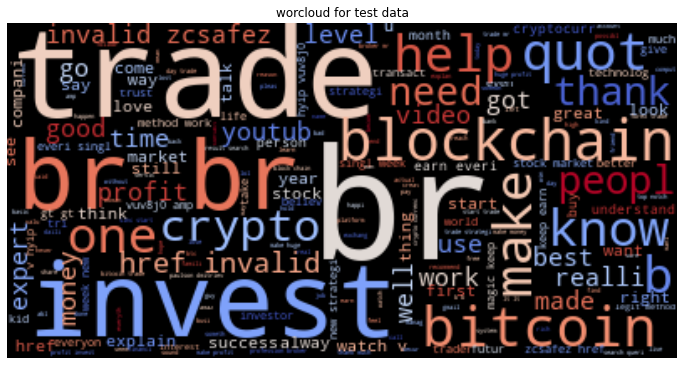

In [31]:
#whole dataset
from wordcloud import WordCloud
wordcloud = WordCloud(margin=0,background_color='black',colormap='coolwarm')
wordcloud.generate(' '.join(df['clean_text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('worcloud for test data')
plt.show()

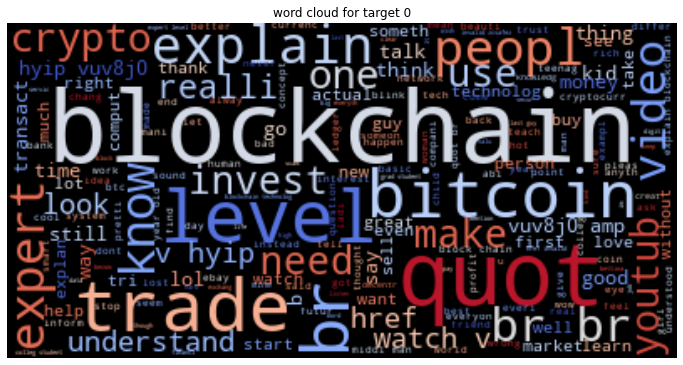

In [28]:
#few wordclouds
#when not spam
from wordcloud import WordCloud
#interplotaion in bilinear way
wordcloud = WordCloud(margin=0,background_color='black',colormap='coolwarm')
wordcloud.generate(' '.join(df[df['Spam']==0]['clean_text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title("word cloud for target 0")
plt.margins(x=0,y=0)
plt.show()

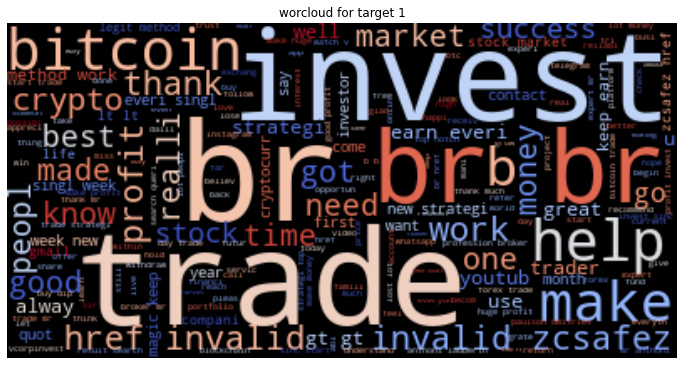

In [30]:
#when spam comments world cloud
wordcloud = WordCloud(margin=0,background_color='black',colormap='coolwarm')
wordcloud.generate(' '.join(df[df['Spam']==1]['clean_text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('worcloud for target 1')
plt.show()

In [32]:
#intiliazing Count vector
vector  = hero.CountVectorizer()


In [33]:
x = vector.fit_transform(df['clean_text'])
xtfidf = hero.tfidf(df['clean_text'])

In [34]:
y =df['Spam'].values

<h1>Models </h2>

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,plot_confusion_matrix

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=69)
#printing the shapes of training and testing data
print("X_training set shape{},X_testing set shape{}".format(X_train.shape,X_test.shape))
print("y_training set shape{},y_testing set shape{}".format(y_train.shape,y_test.shape))

X_training set shape(3350, 7599),X_testing set shape(1650, 7599)
y_training set shape(3350,),y_testing set shape(1650,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
cv = cross_val_score(lr,x,y,cv = 10)
cv

array([0.698, 0.776, 0.836, 0.898, 0.908, 0.902, 0.88 , 0.856, 0.924,
       0.922])

In [48]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("[__info__] Accuracy of the Respective Model for train data is  :{}".format(accuracy_score(y_train, y_pred)*100))
y_pred = model.predict(X_test)
print("[__info__] Accuracy of the Respective Model for test data is  :{}".format(accuracy_score(y_test, y_pred)*100))

[__info__] Accuracy of the Respective Model for train data is  :96.65671641791045
[__info__] Accuracy of the Respective Model for test data is  :87.75757575757575


In [51]:
from sklearn.naive_bayes import GaussianNB as gnb
model = gnb()
model.fit(X_train.toarray(),y_train)
y_pred = model.predict(X_train.toarray())
print("[__info__] Accuracy of the Respective Model for train data is  :{}".format(accuracy_score(y_train, y_pred)*100))
y_pred = model.predict(X_test.toarray())
print("[__info__] Accuracy of the Respective Model for test data is  :{}".format(accuracy_score(y_test, y_pred)*100))

[__info__] Accuracy of the Respective Model for train data is  :92.74626865671641
[__info__] Accuracy of the Respective Model for test data is  :76.9090909090909


In [53]:
from sklearn.tree import DecisionTreeClassifier as dtc
model = dtc()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("[__info__] Accuracy of the Respective Model for train data is  :{}".format(accuracy_score(y_train, y_pred)*100))
y_pred = model.predict(X_test)
print("[__info__] Accuracy of the Respective Model for test data is  :{}".format(accuracy_score(y_test, y_pred)*100))

[__info__] Accuracy of the Respective Model for train data is  :99.25373134328358
[__info__] Accuracy of the Respective Model for test data is  :84.24242424242424


In [55]:
from sklearn.ensemble import RandomForestClassifier as rcf 
model = rcf()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("[__info__] Accuracy of the Respective Model for train data is  :{}".format(accuracy_score(y_train, y_pred)*100))
y_pred = model.predict(X_test)
print("[__info__] Accuracy of the Respective Model for test data is  :{}".format(accuracy_score(y_test, y_pred)*100))

[__info__] Accuracy of the Respective Model for train data is  :99.25373134328358
[__info__] Accuracy of the Respective Model for test data is  :89.2121212121212


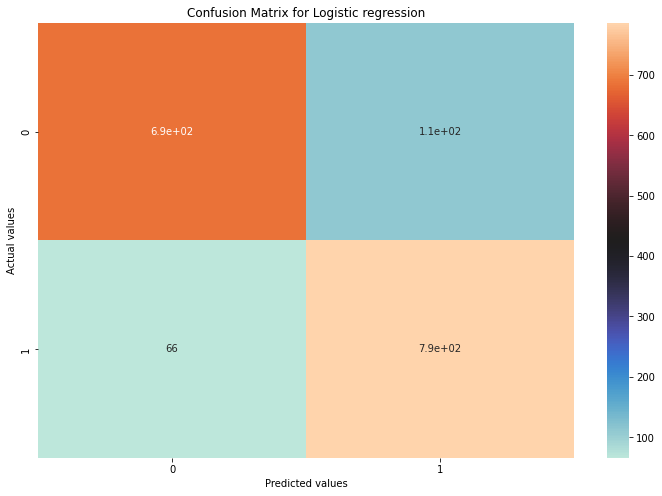

In [56]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regression')
plt.show()

<h2>TFIDF</h2>

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtfidf.values, y, test_size=0.33, random_state=69)
#printing the shapes of training and testing data
print("X_training set shape{},X_testing set shape{}".format(X_train.shape,X_test.shape))
print("y_training set shape{},y_testing set shape{}".format(y_train.shape,y_test.shape))

X_training set shape(3350,),X_testing set shape(1650,)
y_training set shape(3350,),y_testing set shape(1650,)


In [71]:
X_train = X_train.tolist()
X_test = X_test.tolist()

In [72]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("[__info__] Accuracy of the Respective Model for train data is  :{}".format(accuracy_score(y_train, y_pred)*100))
y_pred = model.predict(X_test)
print("[__info__] Accuracy of the Respective Model for test data is  :{}".format(accuracy_score(y_test, y_pred)*100))

[__info__] Accuracy of the Respective Model for train data is  :93.01492537313433
[__info__] Accuracy of the Respective Model for test data is  :88.54545454545455


In [74]:
from sklearn.naive_bayes import GaussianNB as gnb
model = gnb()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("[__info__] Accuracy of the Respective Model for train data is  :{}".format(accuracy_score(y_train, y_pred)*100))
y_pred = model.predict(X_test)
print("[__info__] Accuracy of the Respective Model for test data is  :{}".format(accuracy_score(y_test, y_pred)*100))

[__info__] Accuracy of the Respective Model for train data is  :93.28358208955224
[__info__] Accuracy of the Respective Model for test data is  :76.48484848484848


In [75]:
from sklearn.tree import DecisionTreeClassifier as dtc
model = dtc()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("[__info__] Accuracy of the Respective Model for train data is  :{}".format(accuracy_score(y_train, y_pred)*100))
y_pred = model.predict(X_test)
print("[__info__] Accuracy of the Respective Model for test data is  :{}".format(accuracy_score(y_test, y_pred)*100))

[__info__] Accuracy of the Respective Model for train data is  :99.28358208955224
[__info__] Accuracy of the Respective Model for test data is  :82.78787878787878


In [76]:
from sklearn.ensemble import RandomForestClassifier as rcf 
model = rcf()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("[__info__] Accuracy of the Respective Model for train data is  :{}".format(accuracy_score(y_train, y_pred)*100))
y_pred = model.predict(X_test)
print("[__info__] Accuracy of the Respective Model for test data is  :{}".format(accuracy_score(y_test, y_pred)*100))

[__info__] Accuracy of the Respective Model for train data is  :99.28358208955224
[__info__] Accuracy of the Respective Model for test data is  :89.27272727272727


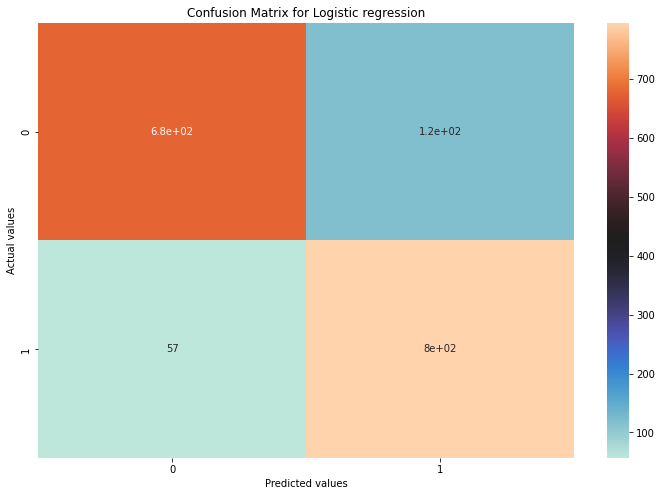

In [77]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regression')
plt.show()